<a href="https://colab.research.google.com/github/AddankiVasavi/Classification-of-Cotton-Disease-using-Resnet-50-for-Precision-Agriculture-./blob/main/Mini_1_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_hub as hub
from IPython.display import Image
from keras.preprocessing import image
from sklearn.model_selection import train_test_split
import os
import zipfile
import random
import datetime
import shutil
from google.colab import files
from sklearn.metrics import confusion_matrix
from keras.models import load_model
from keras.preprocessing import image

# make augmentation directory for the results
#!mkdir '/content/drive/MyDrive'
# list of image path and label for dataframe
IMAGE_PATH = []
LABEL = []
Test_label=[]
test_path=[]
# RICE
cotton_train_list = ['/content/drive/MyDrive/Colab Notebooks/cotton/cotton/bacterial_blight', '/content/drive/MyDrive/Colab Notebooks/cotton/cotton/curl_virus','/content/drive/MyDrive/Colab Notebooks/cotton/cotton/fussarium_wilt']
for index in range(len(cotton_train_list)):
  for image in os.listdir(cotton_train_list[index]):
    IMAGE_PATH.append(os.path.join(cotton_train_list[index], image))
for i in range(448):
  LABEL.append("Bacterial Blight -Bacterial family ")
for i in range(418):
  LABEL.append("Leaf curl - Virus Family")
for i in range(419):
  LABEL.append("Fusarium Wilt-Fungal Family")
test_list=['/content/drive/MyDrive/Colab Notebooks/cotton/cotton/test']
for index in range(len(test_list)):
  for image in os.listdir(test_list[index]):
    test_path.append(os.path.join(test_list[index], image))
for i in range(3):
  Test_label.append("Bacterial Blight - Bacterial family")
for i in range(3):
  Test_label.append("Leaf curl - Virus Family")
for i in range(3):
  Test_label.append("Fusarium Wilt-Fungal Family")
print(Test_label)
database1=pd.DataFrame(test_path, columns=['test_path'])
database1['test_label']=Test_label
print(database1)
database = pd.DataFrame(IMAGE_PATH, columns=['path'])

database['label'] = LABEL

database.head()
print(database)
X_train, X_val, y_train, y_val = train_test_split(database['path'], database['label'], test_size=0.1)
unique_label = np.array(database['label'].unique())
print(unique_label)
print(list(y_val))
print(X_val)

FileNotFoundError: ignored

In [ ]:
# num unique labels
num_unique_label = len(unique_label)
num_unique_label
# Encoding labels
# Turns into boolean array for all index
# train
boolean_array_train = [i == unique_label for i in y_train]
# validation
boolean_array_val = [i == unique_label for i in y_val]
# check boolean array for data in index 0
boolean_array_train[0]

# Turn into tensor set
# train
train_set = tf.data.Dataset.from_tensor_slices(( tf.constant(X_train), tf.constant(boolean_array_train) ))
# validation
val_set = tf.data.Dataset.from_tensor_slices(( tf.constant(X_val), tf.constant(boolean_array_val) ))


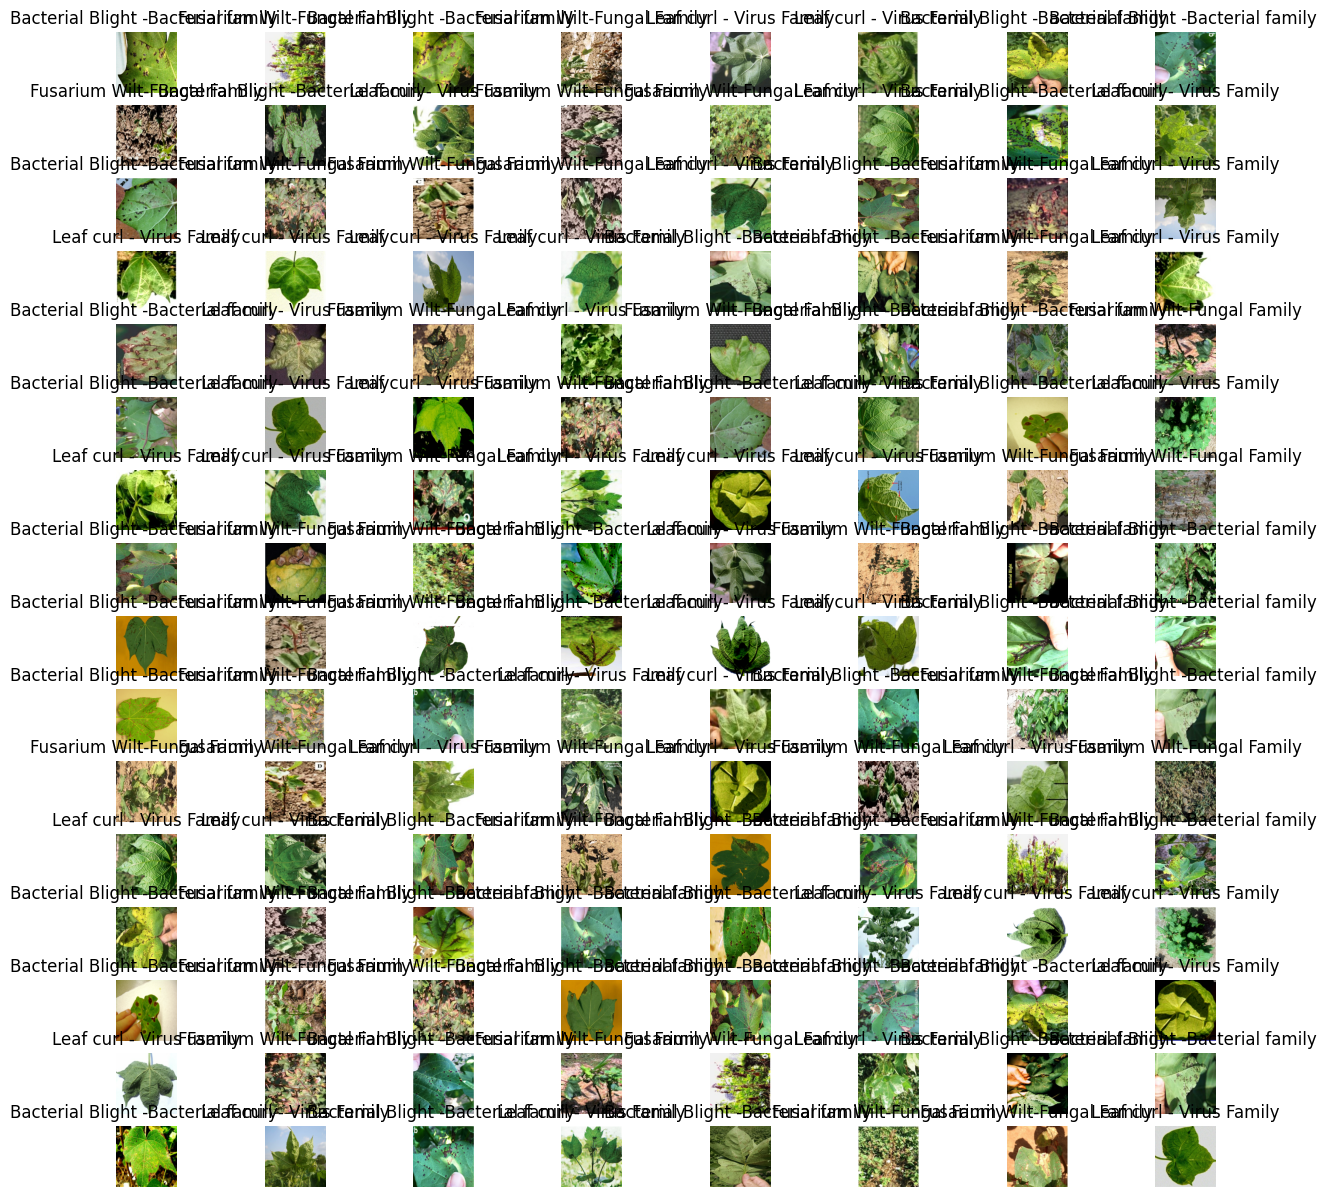

In [ ]:
BUFFER_SIZE = len(train_set)
train_set = train_set.shuffle(BUFFER_SIZE)

# our desired image size
IMAGE_SIZE = 224
# read, turn image into number, normalize, resize
def preprocess_image(image_path, labels=None):
  image = tf.io.read_file(image_path)
  image = tf.image.decode_jpeg(image, channels=3)
  image = tf.image.convert_image_dtype(image, dtype=tf.float32)
  image = tf.image.resize(image, size=[IMAGE_SIZE, IMAGE_SIZE])
  return image, labels
# apply
train_set = train_set.map(preprocess_image)
val_set = val_set.map(preprocess_image)


# batch size
BATCH_SIZE = 128
# batching train & validation set
train_set = train_set.batch(BATCH_SIZE)
val_set = val_set.batch(BATCH_SIZE)
# check element spec
train_set.element_spec

def show_images_in_a_batch(images, labels):
  plt.figure(figsize=(15, 15))
# for each image in one batch (32 images)
  for i in range(128):
# Create subplots (8 rows, 5 columns)
    ax = plt.subplot(16, 8, i+1) # i = index
# Show the image
    plt.imshow(images[i])
# Add the image label as the title
    plt.title(unique_label[np.argmax(labels[i])])
# Turn the grid lines off
    plt.axis("off")
# take one random batch from training set
sample_train_images, sample_train_labels = next(iter(train_set))
# show
show_images_in_a_batch(sample_train_images, sample_train_labels)

In [ ]:
# 1. Create Model
model = tf.keras.Sequential([
# transfer learning model
hub.KerasLayer("https://tfhub.dev/tensorflow/resnet_50/feature_vector/1"),
# output layer
tf.keras.layers.Dense(units=num_unique_label, activation='softmax')])
# 2. Compile Model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# build the model and pass the input shape
model.build(input_shape = [None, 224, 224, 3])
# 3. Create Callback
# EARLYSTOPPING CALLBACK, monitor the val loss (prevent overfitting)
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
# 4. Training Model
history_train = model.fit(train_set, epochs=2, validation_data = val_set, callbacks=[early_stopping])

Epoch 1/3
10/10 [==============================] - 316s 30s/step - loss: 0.8864 - accuracy: 0.5952 - val_loss: 0.4141 - val_accuracy: 0.8760
Epoch 2/3
10/10 [==============================] - 335s 34s/step - loss: 0.3173 - accuracy: 0.9118 - val_loss: 0.2862 - val_accuracy: 0.8992
Epoch 3/3
10/10 [==============================] - 312s 31s/step - loss: 0.2119 - accuracy: 0.9412 - val_loss: 0.2147 - val_accuracy: 0.9070


In [ ]:
model.save("ME_model.h5")
model_path="ME_model.h5"

Saving 1bact84.jpg to 1bact84.jpg
Saving 2bact96.jpg to 2bact96.jpg
Saving 3bact110.jpeg to 3bact110.jpeg
Saving 4curl257.jpg to 4curl257.jpg
Saving 5curl270.jpeg to 5curl270.jpeg
Saving 6curl308.jpg to 6curl308.jpg
Saving 7fus207.jpg to 7fus207.jpg
Saving 8fus263.jpg to 8fus263.jpg
Saving 9fus270.jpeg to 9fus270.jpeg
['/content/1bact84.jpg', '/content/2bact96.jpg', '/content/3bact110.jpeg', '/content/4curl257.jpg', '/content/5curl270.jpeg', '/content/6curl308.jpg', '/content/7fus207.jpg', '/content/8fus263.jpg', '/content/9fus270.jpeg']
5/5 [==============================] - 28s 5s/step
[[9.99747634e-01 1.50389635e-04 1.02013590e-04]
 [1.52418045e-02 9.79960442e-01 4.79768869e-03]
 [8.64749588e-03 7.27651408e-03 9.84075904e-01]
 [9.69294727e-01 2.37427629e-03 2.83310357e-02]
 [5.73271594e-04 1.67024403e-03 9.97756481e-01]
 [1.37018487e-01 8.40750337e-01 2.22310796e-02]
 [7.92463683e-03 1.49371445e-01 8.42703998e-01]
 [1.53590098e-01 7.81980515e-01 6.44293427e-02]
 [9.87719893e-01 6.29

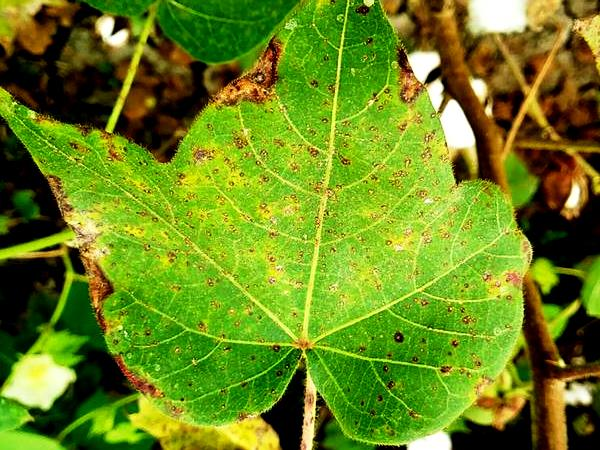

Leaf curl - Virus Family


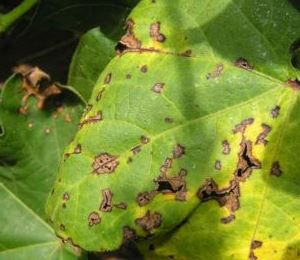

Fusarium Wilt-Fungal Family


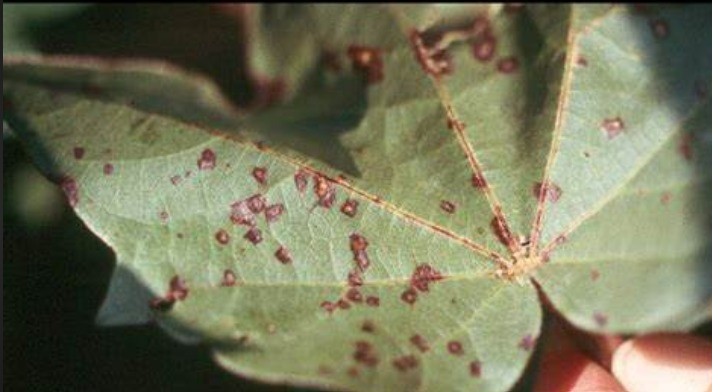

Bacterial Blight -Bacterial family 


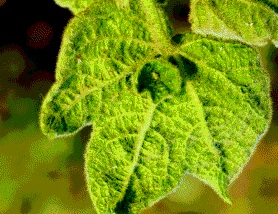

Fusarium Wilt-Fungal Family


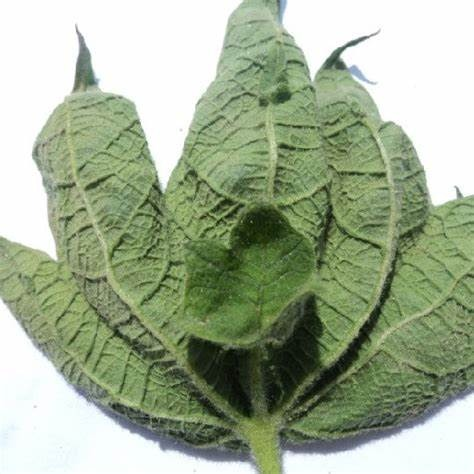

Leaf curl - Virus Family


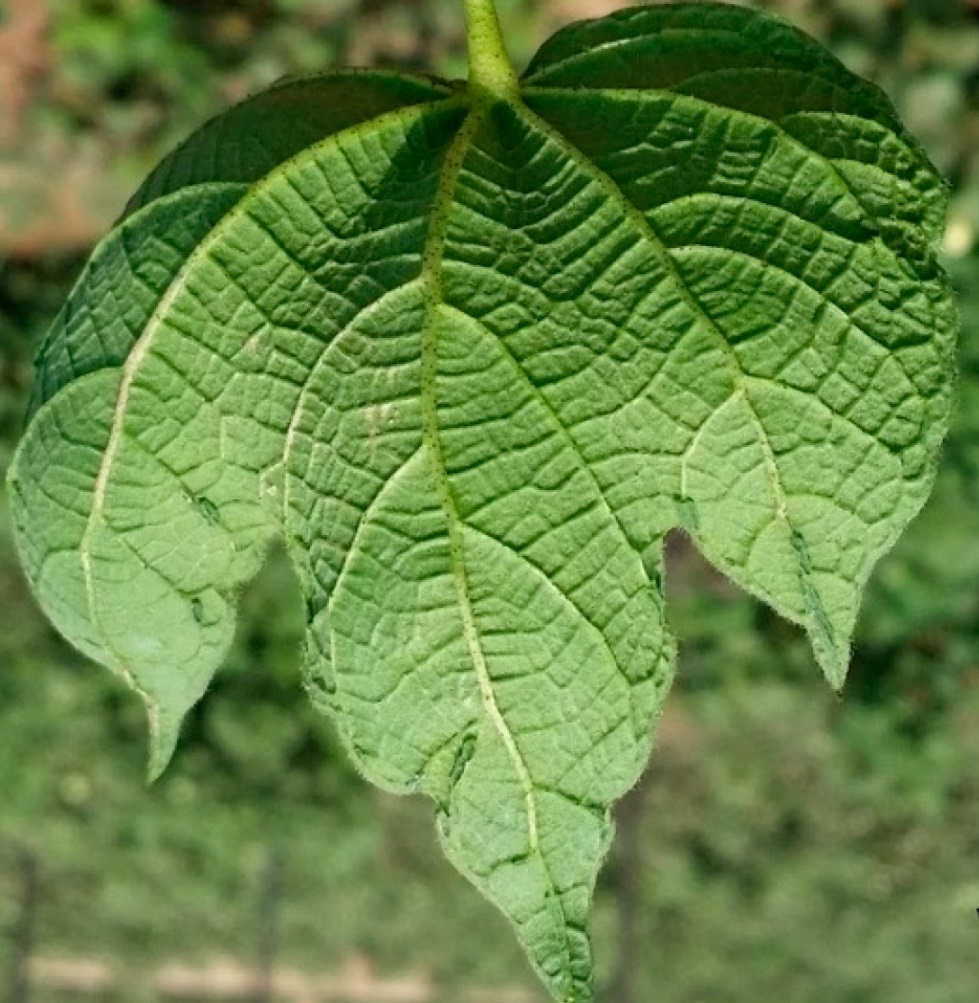

Fusarium Wilt-Fungal Family


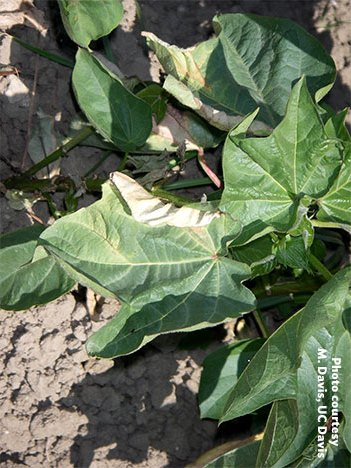

Leaf curl - Virus Family


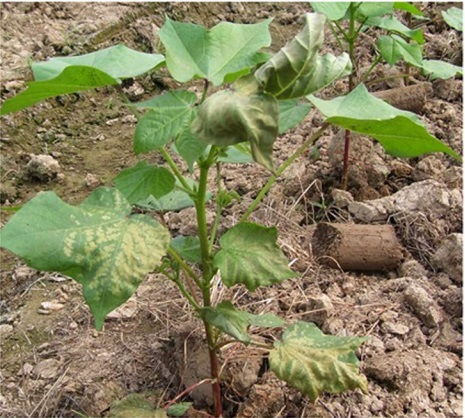

Bacterial Blight -Bacterial family 


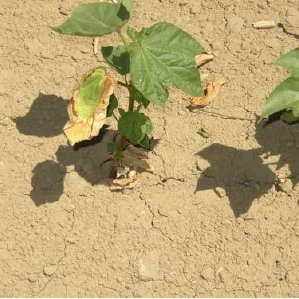

                                     precision    recall  f1-score   support

Bacterial Blight -Bacterial family        0.92      0.89      0.91        38
        Fusarium Wilt-Fungal Family       0.86      0.86      0.86        44
           Leaf curl - Virus Family       0.94      0.96      0.95        47

                           accuracy                           0.91       129
                          macro avg       0.91      0.91      0.91       129
                       weighted avg       0.91      0.91      0.91       129

[[34  4  0]
 [ 3 38  3]
 [ 0  2 45]]


AttributeError: ignored

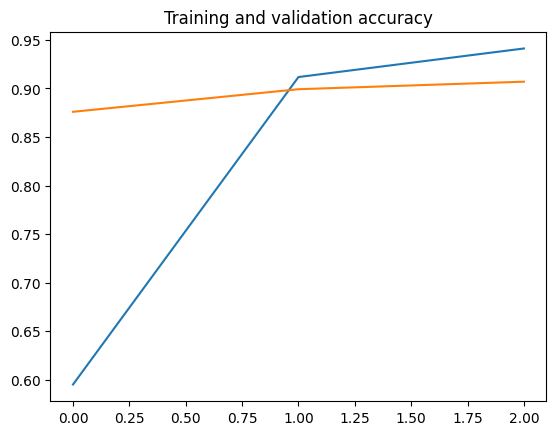

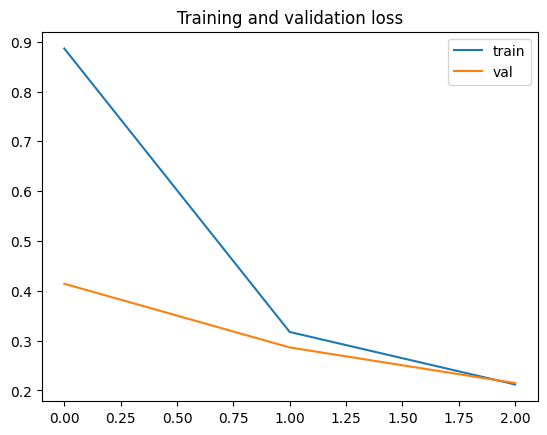

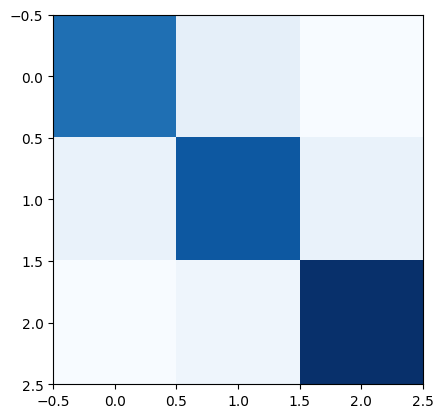

In [ ]:
# train
from sklearn.metrics import classification_report
acc = history_train.history['accuracy']
loss = history_train.history['loss']
# validation
val_acc = history_train.history['val_accuracy']
val_loss = history_train.history['val_loss']
# range number of epochs
epochs = range(len(acc))
# plot training and validation accuracy per epoch
plt.figure()
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Training and validation accuracy')
plt.figure()
# plot training and validation loss per epoch
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Training and validation loss')
plt.legend(['train', 'val'])
# upload files
uploaded=files.upload()
filename = []
test_images = []
for fn in uploaded.keys():
    filename.append(fn)

    path='/content/' + fn
    test_images.append(path)
print(test_images)

# turn into set
test_set = tf.data.Dataset.from_tensor_slices(( tf.constant(list(X_val)) ))
# preprocess
test_set = test_set.map(preprocess_image)
# batching
test_set = test_set.batch(batch_size=32)


# predict
test_predictions = model.predict(test_set)
print(test_predictions)
label_prediction = []
for i in range(len(test_predictions)):
    label_prediction.append(unique_label[np.argmax(test_predictions[i])])
print(label_prediction)
print(list(y_val))
unique_labels = np.unique(Test_label)
num_classes = len(unique_labels)
# show prediction results
for i in range(len(test_images)):
    print(label_prediction[i])
    pil_img = Image(filename=test_images[i], width=150, height=150)
    display(pil_img)
cm = confusion_matrix(list(y_val),label_prediction)
cr=classification_report(list(y_val),label_prediction)
print(cr)

print(cm)
plt.figure()
plt.imshow(cm, cmap=plt.cm.Blues)
plt.imshow(cr, cmap=plt.cr.Blues)
plt.title('Confusion Matrix for Cotton Disease Classification')
plt.colorbar()
tick_marks = np.arange(len(unique_label))
plt.xticks(tick_marks, unique_label, rotation=45)
plt.yticks(tick_marks, unique_label)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

In [ ]:
pip install tensorflow_addons

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 591.0/591.0 kB 8.7 MB/s eta 0:00:00


In [ ]:
pip install gradio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.9/19.9 MB 41.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 49.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 6.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 288.1/288.1 kB 26.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.4/75.4 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 22.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.8/135.8 kB 14.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 k

In [ ]:
import tensorflow as tf
import tensorflow_addons as tfa
import tensorflow_hub as hub
import gradio as gr
from PIL import Image
import numpy as np
import cv2
import warnings

warnings.filterwarnings('ignore')
import base64

# Define custom metric function
f1_score = tfa.metrics.F1Score(num_classes=3)


# Load saved model
model = tf.keras.models.load_model('/content/ME_model.h5',custom_objects={'KerasLayer':hub.KerasLayer})

# Define class names for predictions
class_names = {
    0:'Bacterial Blight',
    1:'Leaf Curl',
    2:'Fusarium Wilt',

}

def classify_image(inp):
    IMAGE_SIZE = 224

    image = tf.io.encode_jpeg(inp)

    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.convert_image_dtype(image, dtype=tf.float32)
    #image = tf.image.resize(image, size=[IMAGE_SIZE, IMAGE_SIZE])
    image = tf.image.resize(image, (224, 224))  # Resize image to (224, 224)
    image = tf.expand_dims(image, axis=0)
    pred_probs = model.predict(image)
    pred_class = np.argmax(pred_probs)
    label = class_names[pred_class]
    return label

# Define Gradio interface
inputs = gr.inputs.Image(shape=(224, 224), source="upload")
outputs = gr.outputs.Label(num_top_classes=3)
interface = gr.Interface(fn=classify_image, inputs=inputs, outputs=outputs)
# Run interface
interface.launch(debug=True)


/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>